<a href="https://colab.research.google.com/github/akumarpandey686/DataPreprocessing_Code/blob/master/Transfer_Learning_forAll_CNN_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/data1_300/train'
valid_path = '/content/drive/My Drive/data1_300/test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [8]:
# useful for getting number of classes
folders = glob('/content/drive/My Drive/data1_300/train/*')
folders

['/content/drive/My Drive/data1_300/train/np',
 '/content/drive/My Drive/data1_300/train/p']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/data1_300/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 173 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/data1_300/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 2 classes.


In [20]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
6/6 [==============================] - 108s 18s/step - loss: 1.2921 - accuracy: 0.6705 - val_loss: 0.4382 - val_accuracy: 0.7778
Epoch 2/5
6/6 [==============================] - 3s 421ms/step - loss: 0.4768 - accuracy: 0.7572 - val_loss: 0.2459 - val_accuracy: 0.8333
Epoch 3/5
6/6 [==============================] - 3s 419ms/step - loss: 0.2176 - accuracy: 0.9017 - val_loss: 0.1295 - val_accuracy: 0.9444
Epoch 4/5
6/6 [==============================] - 3s 468ms/step - loss: 0.1186 - accuracy: 0.9653 - val_loss: 0.1141 - val_accuracy: 0.9444
Epoch 5/5
6/6 [==============================] - 3s 426ms/step - loss: 0.0545 - accuracy: 0.9884 - val_loss: 0.1269 - val_accuracy: 0.9444


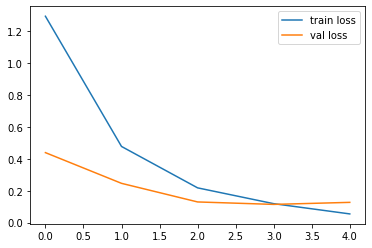

<Figure size 432x288 with 0 Axes>

In [22]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

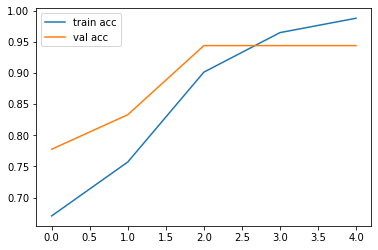

<Figure size 432x288 with 0 Axes>

In [25]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
import tensorflow as tf
from keras.models import load_model

In [27]:
model.save('vgg16_p&np.h5')

In [ ]:
model.download